# Dataproject

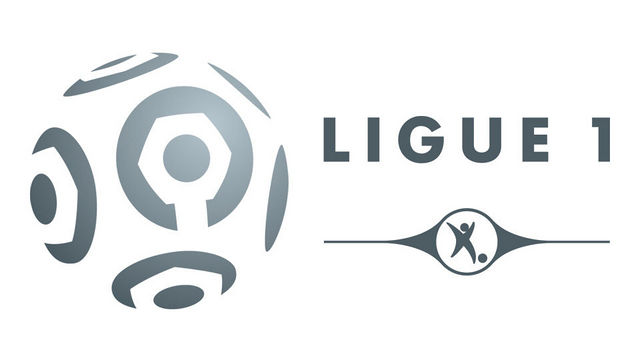

###### Welcome to our dataproject, that takes a look at data from two periods in the French football league Ligue 1, 2007-2016 and 1945-1954.

###### The point of this project is to check whether the "Home Advantage", that is talked of in all sports is an actual phenomenon or a myth, waiting to be debunked.

###### Our initial thought is that it indeed exists, but what we don't know is to what extent. Can we put a number on it, numerize the actual advantage ?

###### We will also make comparisons between the two time periods, to see how football changed over the course of about 60 years.

In [69]:
# Importing the initial packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# We incorporate the first database from which we will be working (seasons 2007-2016, French Ligue 1)

database = pd.read_excel('Dataproject.xlsx')

# We trim the table down by removing unneeded columns

database.drop(['Colonne1', 'Date', 'Score', 'Division', 'TotGoals'], axis='columns', inplace=True)

db = database

print(db)

      Season                 Home              Visitor  Hgoal  Vgoal  GoalDiff
0       2007        RC Strasbourg  Olympique Marseille      0      0         0
1       2007   Girondins Bordeaux              RC Lens      1      0         1
2       2007              SM Caen             OGC Nice      1      0         1
3       2007            Lille OSC           FC Lorient      0      0         0
4       2007            AS Monaco     AS Saint-Etienne      1      1         0
...      ...                  ...                  ...    ...    ...       ...
3795    2016  Olympique Marseille            SC Bastia      1      0         1
3796    2016             AS Nancy     AS Saint-Etienne      3      1         2
3797    2016  Paris Saint-Germain              SM Caen      1      1         0
3798    2016         Stade Rennes            AS Monaco      2      3        -1
3799    2016          Toulouse FC            Dijon FCO      0      0         0

[3800 rows x 6 columns]


In [71]:
# We set a dictionary called results

results = {'win': 0, 'draw': 0, 'loss': 0}

for value in db['GoalDiff']:
   
    if value > 0:
        results['win'] += 1
        
    elif value == 0:
        results['draw'] += 1
        
    else:
        results['loss'] += 1
        
print('the results for the 2007-16 period are : ' + str(results))
    

the results for the 2007-16 period are : {'win': 1711, 'draw': 1070, 'loss': 1019}


In [72]:
# We now do the same operations on our 2nd database (Seasons 1945-1954, French Ligue 1)

database_1 = pd.read_excel('Dataproject1.xlsx')
database_1.drop(['#', 'Date', 'Score', 'Division', 'TotGoals'], axis='columns', inplace=True)
db_1 = database_1

# We set up the second dictionary results_1

results_1 = {'win': 0, 'draw': 0, 'loss': 0}

for value in db_1['GoalDiff']:
   
    if value > 0:
        results_1['win'] += 1
        
    elif value == 0:
        results_1['draw'] += 1
        
    else:
        results_1['loss'] += 1
        
        
print('the results for the 2007-16 period are : ' + str(results_1))

the results for the 2007-16 period are : {'win': 1718, 'draw': 675, 'loss': 701}


In [73]:
# The two periods do not have the same amount of games, so we need ratios to compare

def ratio(val, tot):
    return val / tot

sum_r = 1711 + 1070 + 1019
sum_r1 = results_1['win'] + results_1['draw'] + results_1['loss']

winr = round(ratio(results['win'], sum_r), 2)
winr1 = round(ratio(results_1['win'], sum_r1),2)

print('The win ratio for home teams from 2007 to 2016 in Ligue 1 is ' + str(winr))
print('The win ratio for home teams from 1945 to 1954 in Ligue 1 is ' + str(winr1))

The win ratio for home teams from 2007 to 2016 in Ligue 1 is 0.45
The win ratio for home teams from 1945 to 1954 in Ligue 1 is 0.56


In [74]:
# Let's quantify the home advantage
# We want to see the absolute advantage, so we only take the wins and losses into account

h_adv = round(ratio(results['win'], results['win']+results['loss']), 2)
h_adv1 = round(ratio(results_1['win'], results_1['win']+results_1['loss']), 2)

print('2007-2016 : ' + '\033[1m' + str(h_adv) + '\033[0;0m' + ' > 0.5')
print('1945-1954 : ' + '\033[1m' +  str(h_adv1) + '\033[0;0m' + ' > 0.5')

2007-2016 : 0.63 > 0.5
1945-1954 : 0.71 > 0.5


As we can see above, the home advantage really exists, and is very significant when we consider 'Draw' as as a neutral result, and discard it.

However, the fact that it was more important during 1945-54 than during 2007-16 is surprising, considering home advantage is often associated with the fervor of supporters, and fervor comes with numbers. So, with our undeniably larger stadiums nowadays, we would have expected the opposite result.

Then where does it come from ?

A popular theory would be that, 70 years ago, football tactics and formations were not as developed as today.
This would have lead to more goals being scored, due to defenses being less organized to stop the opposing forwards.

The databases provide us with information regarding the amount of goals scored and the teams that scored them.

We will use this information to check wheter or not this theory is plausible.

In [75]:
# At the beginning of the project, we deleted the column 'TotGoals' : Let's add it back

db['TotGoals'] = db['Hgoal'] + db['Vgoal']
db_1['TotGoals'] = db_1['Hgoal'] + db_1['Vgoal']

# Round up to 2 decimal places
mean_goals = round(db['TotGoals'].mean(), 2)
mean_goals1 = round(db_1['TotGoals'].mean(), 2)

print(f'During the period 1945-54, an average of ' + str(mean_goals1) + ' were scored per game, compared to ' + str(mean_goals) + ' nowadays.')

During the period 1945-54, an average of 3.45 were scored per game, compared to 2.44 nowadays.


A decrease of one goal per game is pretty significant in a sport like football, that is already pretty low-scoring.

Now what about the average goal per game for both home and visitors in the two time frames ?
It obviously changed, but how so ?

In [76]:
# We incorporate the first database from which we will be working

dataframe = pd.read_excel('Dataproject.xlsx')

print(dataframe)

# We trim the table down by removing unneeded columns

dataframe.drop(['Colonne1', 'Date', 'Score', 'Division', 'TotGoals','Home', 'Visitor', 'GoalDiff', 'Season'], axis='columns', inplace=True)

print(dataframe)

      Colonne1       Date  Season                 Home              Visitor  \
0            1 2007-08-04    2007        RC Strasbourg  Olympique Marseille   
1            2 2007-08-04    2007   Girondins Bordeaux              RC Lens   
2            3 2007-08-04    2007              SM Caen             OGC Nice   
3            4 2007-08-04    2007            Lille OSC           FC Lorient   
4            5 2007-08-04    2007            AS Monaco     AS Saint-Etienne   
...        ...        ...     ...                  ...                  ...   
3795      3796 2017-05-20    2016  Olympique Marseille            SC Bastia   
3796      3797 2017-05-20    2016             AS Nancy     AS Saint-Etienne   
3797      3798 2017-05-20    2016  Paris Saint-Germain              SM Caen   
3798      3799 2017-05-20    2016         Stade Rennes            AS Monaco   
3799      3800 2017-05-20    2016          Toulouse FC            Dijon FCO   

     Score  Hgoal  Vgoal Division  TotGoals  GoalDi

In [77]:
#We compute the sum of the columns
total = dataframe.sum()
dataframe_total = dataframe.append(total,ignore_index = True)
print(dataframe_total)

      Hgoal  Vgoal
0         0      0
1         1      0
2         1      0
3         0      0
4         1      1
...     ...    ...
3796      3      1
3797      1      1
3798      2      3
3799      0      0
3800   5363   3924

[3801 rows x 2 columns]


In [78]:
#We import the second DataFrame and we set up the values that we got before
dataframe2 = pd.read_excel('Dataproject1.xlsx')
print(dataframe2)
sum_g = 5363 + 3924
Hgoal07 = 5363
Vgoal07 = 3924

         #       Date  Season                   Home               Visitor  \
0        1 1945-08-26    1945                RC Lens               FC Sete   
1        2 1945-08-26    1945       AS Saint-Etienne            RC Roubaix   
2        3 1945-08-26    1945              Lille OSC             AS Cannes   
3        4 1945-08-26    1945           Stade Rennes              FC Rouen   
4        5 1945-08-26    1945  Racing Club de France   Olympique Marseille   
...    ...        ...     ...                    ...                   ...   
3089  3090 1955-05-22    1954              Lille OSC  AS Troyes-Savinienne   
3090  3091 1955-05-22    1954       AS Saint-Etienne    Girondins Bordeaux   
3091  3092 1955-05-22    1954  Racing Club de France            RC Roubaix   
3092  3093 1955-05-22    1954               AS Nancy   Olympique Marseille   
3093  3094 1955-05-22    1954        Nimes Olympique        Olympique Lyon   

     Score  Hgoal  Vgoal Division  TotGoals  GoalDiff  
0      

In [79]:
#We just delete the unrelevant columns for ou rata analysis
dataframe2.drop(['#', 'Date', 'Score', 'Division', 'TotGoals','Home', 'Visitor', 'GoalDiff', 'Season'], axis='columns', inplace=True)
print(dataframe2)

      Hgoal  Vgoal
0         5      1
1         1      3
2         5      1
3         2      0
4         2      6
...     ...    ...
3089      1      2
3090      3      1
3091      2      2
3092      3      0
3093      2      2

[3094 rows x 2 columns]


In [80]:
#We compute the total goals per column for the 1945-1964 seasons
total2 = dataframe2.sum()
dataframe2_total = dataframe.append(total2,ignore_index = True)
print(dataframe2_total)

      Hgoal  Vgoal
0         0      0
1         1      0
2         1      0
3         0      0
4         1      1
...     ...    ...
3796      3      1
3797      1      1
3798      2      3
3799      0      0
3800   6692   3970

[3801 rows x 2 columns]


In [81]:
Games45 = 3800
Hgoal45 = 6692
Vgoal45 = 3970
sum_g45 = 6698 + 3970
sum_g07 = 5363 + 3924
print('There were ' + str(sum_g45) + ' goals in the French championship between 1945 and 1954 for a total of 3800 games.')
print(str(Hgoal45) + ' were for the home team and ' + str(Vgoal45) + ' were for the visitors')

There were 10668 goals in the French championship between 1945 and 1954 for a total of 3800 games.
6692 were for the home team and 3970 were for the visitors


In [82]:
#We set the values and create the ratios of goals per game
def ratio(val,tot):
    return val / tot
sum_g07 = 5363 + 3924
Hgoal07 = 5363
Vgoal07 = 3924
Games45 = 3800
goalr45 = round(ratio(Hgoal45, Games45), 2)
goalr452 = round(ratio(Vgoal45, Games45), 2)
goalr07 = round(ratio(Hgoal07, Games45), 2)
goalr072 = round(ratio(Vgoal07, Games45), 2)
print( 'The goal ratio per game for home teams from 2007 to 2016 is ' + str(goalr07))
print( 'The goal ratio per game for visitors from 2007 to 2016 is ' + str(goalr072))
print( 'The goal ratio per game for home teams from 1945 to 1954 is ' + str(goalr45))
print( 'The goal ratio per game for visitors from 1945 to 1954 is ' + str(goalr452))

The goal ratio per game for home teams from 2007 to 2016 is 1.41
The goal ratio per game for visitors from 2007 to 2016 is 1.03
The goal ratio per game for home teams from 1945 to 1954 is 1.76
The goal ratio per game for visitors from 1945 to 1954 is 1.04


In [83]:
#We set a new pandas Dataframe for us to create graphs
goalr45 = round(ratio(Hgoal45, Games45), 2)
goalr452 = round(ratio(Vgoal45, Games45), 2)
data = {'season': ['Home teams goal ratio per game','Visitors goal ratio per game'],
        '2007-2016' : [goalr07, goalr072],
        '1945-1964' : [goalr45, goalr452],}
df = (pd.DataFrame (data, columns = ['season', '2007-2016', '1945-1964']))
print(df)

                           season  2007-2016  1945-1964
0  Home teams goal ratio per game       1.41       1.76
1    Visitors goal ratio per game       1.03       1.04


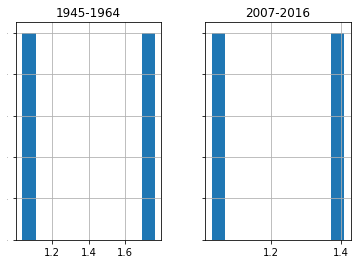

In [84]:
#Now we just create the histograms to display this ratio difference
hist_goals = df.hist(bins = 10,
                    sharey = True,
                    sharex = False,
                    ylabelsize = 0,
                    grid = True)


We can see with this Graph that the gap between the visitors and the home teams goal per game ratio has always been substantial even though the gap was larger back in the days.

We can then say that the home field advantage is real and this can be explained by multiple factors:

First of all the knowledge of the field, playing on the pitch that you are used too is one of the reasons that can explain why the team are performing better when they are in their stadium.

Then the fans, the fans cheering the players up increase the performance of football players, but what seems to come out of these studies is that the numbers of fans cheering you up is not what matters, because the stadiums have increases by ten times in capacity for some teams between 1945 and 2007, but still the home advantage seems to have decreased.

Today, in Ligue 1, the domination of Paris Saint-Germain over the other teams is indisputable. 
But it wasn't the case during the 1945-54 period. Indeed, the club was created in 1970, and will be celebrating its 50th birthday on August 12th this year.

So, which team was above the rest 60 years ago ?

In [85]:
# Set up an empty dictionary for number of home games
h_games = {}

# Process only the first 1000 rows
for name in db_1['Home']:

# If the column value is in the dict, increment its value
    if name in h_games.keys():
        h_games[name] += 1

# Else, add to the dict and set value to 1
    else:
        h_games[name] = 1


# Now for away games        
a_games = {}

for name in db_1['Home']:

    if name in a_games.keys():
        a_games[name] += 1

    else:
        a_games[name] = 1
        

# Converting dictionaries in Dataframes
h_games = pd.DataFrame(h_games.items(), columns=['Team', '#Games'])
a_games = pd.DataFrame(a_games.items(), columns=['Team', '#Games'])


# Combining the Dataframes
games = h_games + a_games


print('The total number of league games for each team between the 1945 and 1954 seasons are :')
print('')
print(games)

The total number of league games for each team between the 1945 and 1954 seasons are :

                                                 Team  #Games
0                                      RC LensRC Lens     270
1                    AS Saint-EtienneAS Saint-Etienne     342
2                                  Lille OSCLille OSC     338
3                            Stade RennesStade Rennes     274
4          Racing Club de FranceRacing Club de France     308
5                Red Star OlympiqueRed Star Olympique      20
6                              Le Havre ACLe Havre AC     202
7                                FC SochauxFC Sochaux     306
8                Girondins BordeauxGirondins Bordeaux     274
9                                RC RoubaixRC Roubaix     342
10                                   FC RouenFC Rouen      66
11                         RC StrasbourgRC Strasbourg     304
12                             Stade ReimsStade Reims     338
13                                 AS Cannes

Out of all these teams, we can see that the ones that played the most games are AS Saint-Etienne, FC Roubaix and Olympique de Marseille with 342 games each. This means that all three managed to stay in the top league through 10 years, without ever dropping to Ligue 2, the second professional league in France.

This shows an undeniable regularity. In fact, both of these are still considered among the best in France today, while FC Roubaix was absorbed by another structure and disappeared from professional football.

In [86]:
# Dictionary with each team 
h_goals = {'RC Lens': 0, 'AS Saint-Etienne': 0,'Lille OSC': 0,'Stade Rennes': 0,
           'Racing Club de France': 0,'Red Star Olympique': 0,'Le Havre AC': 0,'FC Sochaux': 0,
           'Girondins Bordeaux': 0,'RC Roubaix': 0,'FC Rouen': 0,'RC Strasbourg': 0,
           'Stade Reims': 0,'AS Cannes': 0,'Olympique Lyon': 0,'FC Metz': 0,
           'Olympique Marseille': 0,'FC Sete': 0,'Red Star Olympique Audonien': 0,'Toulouse FC': 0,
           'Stade Francais': 0,'AS Nancy': 0,'Stade Olympique Montpellierain': 0,'AS Cannes-Grasse': 0,
           'Olympique Ales': 0,'Stade Red Star': 0,'OGC Nice': 0,'SR Colmar': 0,
           'Nimes Olympique': 0,'Stade Francais FC': 0,'AS Monaco': 0,'AS Troyes-Savinienne': 0}

for i in range(len(db_1[:])):
    for name in h_goals.keys():
        if name == db_1['Home'][i]:
            h_goals[name] += db_1['Hgoal'][i]


# Visitors
a_goals = {'RC Lens': 0, 'AS Saint-Etienne': 0,'Lille OSC': 0,'Stade Rennes': 0,
           'Racing Club de France': 0,'Red Star Olympique': 0,'Le Havre AC': 0,'FC Sochaux': 0,
           'Girondins Bordeaux': 0,'RC Roubaix': 0,'FC Rouen': 0,'RC Strasbourg': 0,
           'Stade Reims': 0,'AS Cannes': 0,'Olympique Lyon': 0,'FC Metz': 0,
           'Olympique Marseille': 0,'FC Sete': 0,'Red Star Olympique Audonien': 0,'Toulouse FC': 0,
           'Stade Francais': 0,'AS Nancy': 0,'Stade Olympique Montpellierain': 0,'AS Cannes-Grasse': 0,
           'Olympique Ales': 0,'Stade Red Star': 0,'OGC Nice': 0,'SR Colmar': 0,
           'Nimes Olympique': 0,'Stade Francais FC': 0,'AS Monaco': 0,'AS Troyes-Savinienne': 0}

for i in range(len(db_1[:])):
    for name in a_goals.keys():
        if name == db_1['Visitor'][i]:
            a_goals[name] += db_1['Vgoal'][i]
            
#Dataframes
h_goals = pd.DataFrame(h_goals.items(), columns=['Team', '#Goals'])
a_goals = pd.DataFrame(a_goals.items(), columns=['Team', '#Goals']) 

#Combine
goals = h_goals + a_goals

print(goals)

                                                 Team  #Goals
0                                      RC LensRC Lens     462
1                    AS Saint-EtienneAS Saint-Etienne     634
2                                  Lille OSCLille OSC     743
3                            Stade RennesStade Rennes     452
4          Racing Club de FranceRacing Club de France     559
5                Red Star OlympiqueRed Star Olympique      33
6                              Le Havre ACLe Havre AC     300
7                                FC SochauxFC Sochaux     531
8                Girondins BordeauxGirondins Bordeaux     561
9                                RC RoubaixRC Roubaix     546
10                                   FC RouenFC Rouen      90
11                         RC StrasbourgRC Strasbourg     512
12                             Stade ReimsStade Reims     706
13                                 AS CannesAS Cannes      54
14                       Olympique LyonOlympique Lyon     144
15      

In [87]:
# Now for the number of wins
h_wins = {'RC Lens': 0, 'AS Saint-Etienne': 0,'Lille OSC': 0,'Stade Rennes': 0,
           'Racing Club de France': 0,'Red Star Olympique': 0,'Le Havre AC': 0,'FC Sochaux': 0,
           'Girondins Bordeaux': 0,'RC Roubaix': 0,'FC Rouen': 0,'RC Strasbourg': 0,
           'Stade Reims': 0,'AS Cannes': 0,'Olympique Lyon': 0,'FC Metz': 0,
           'Olympique Marseille': 0,'FC Sete': 0,'Red Star Olympique Audonien': 0,'Toulouse FC': 0,
           'Stade Francais': 0,'AS Nancy': 0,'Stade Olympique Montpellierain': 0,'AS Cannes-Grasse': 0,
           'Olympique Ales': 0,'Stade Red Star': 0,'OGC Nice': 0,'SR Colmar': 0,
           'Nimes Olympique': 0,'Stade Francais FC': 0,'AS Monaco': 0,'AS Troyes-Savinienne': 0}

for i in range(len(db_1[:])):
    
    for name in h_wins.keys():
        
        if name == db_1['Home'][i]:
            
            if db_1['GoalDiff'][i] > 0:
                
                h_wins[name] += 1

#Visitors
a_wins = {'RC Lens': 0, 'AS Saint-Etienne': 0,'Lille OSC': 0,'Stade Rennes': 0,
           'Racing Club de France': 0,'Red Star Olympique': 0,'Le Havre AC': 0,'FC Sochaux': 0,
           'Girondins Bordeaux': 0,'RC Roubaix': 0,'FC Rouen': 0,'RC Strasbourg': 0,
           'Stade Reims': 0,'AS Cannes': 0,'Olympique Lyon': 0,'FC Metz': 0,
           'Olympique Marseille': 0,'FC Sete': 0,'Red Star Olympique Audonien': 0,'Toulouse FC': 0,
           'Stade Francais': 0,'AS Nancy': 0,'Stade Olympique Montpellierain': 0,'AS Cannes-Grasse': 0,
           'Olympique Ales': 0,'Stade Red Star': 0,'OGC Nice': 0,'SR Colmar': 0,
           'Nimes Olympique': 0,'Stade Francais FC': 0,'AS Monaco': 0,'AS Troyes-Savinienne': 0}

for i in range(len(db_1[:])):
    
    for name in a_wins.keys():
        
        if name == db_1['Home'][i]:
            
            if db_1['GoalDiff'][i] > 0:
                
                a_wins[name] += 1
                
#Dataframes
h_wins = pd.DataFrame(h_wins.items(), columns=['Team', '#Wins'])
a_wins = pd.DataFrame(a_wins.items(), columns=['Team', '#Wins']) 

#Combine
wins = h_wins + a_wins

print(wins)

                                                 Team  #Wins
0                                      RC LensRC Lens    148
1                    AS Saint-EtienneAS Saint-Etienne    204
2                                  Lille OSCLille OSC    224
3                            Stade RennesStade Rennes    142
4          Racing Club de FranceRacing Club de France    152
5                Red Star OlympiqueRed Star Olympique      8
6                              Le Havre ACLe Havre AC    100
7                                FC SochauxFC Sochaux    164
8                Girondins BordeauxGirondins Bordeaux    190
9                                RC RoubaixRC Roubaix    184
10                                   FC RouenFC Rouen     32
11                         RC StrasbourgRC Strasbourg    158
12                             Stade ReimsStade Reims    236
13                                 AS CannesAS Cannes     18
14                       Olympique LyonOlympique Lyon     44
15                      

In [88]:
# Combining all and adding ratios

games['#Goals'] = goals['#Goals']
games['#Wins'] = wins['#Wins']

games['Goals/G'] = round(games['#Goals'] / games['#Games'], 2)
games['WinRate'] = round(games['#Wins'] / games['#Games'], 2)

print(games)

                                                 Team  #Games  #Goals  #Wins  \
0                                      RC LensRC Lens     270     462    148   
1                    AS Saint-EtienneAS Saint-Etienne     342     634    204   
2                                  Lille OSCLille OSC     338     743    224   
3                            Stade RennesStade Rennes     274     452    142   
4          Racing Club de FranceRacing Club de France     308     559    152   
5                Red Star OlympiqueRed Star Olympique      20      33      8   
6                              Le Havre ACLe Havre AC     202     300    100   
7                                FC SochauxFC Sochaux     306     531    164   
8                Girondins BordeauxGirondins Bordeaux     274     561    190   
9                                RC RoubaixRC Roubaix     342     546    184   
10                                   FC RouenFC Rouen      66      90     32   
11                         RC Strasbourg

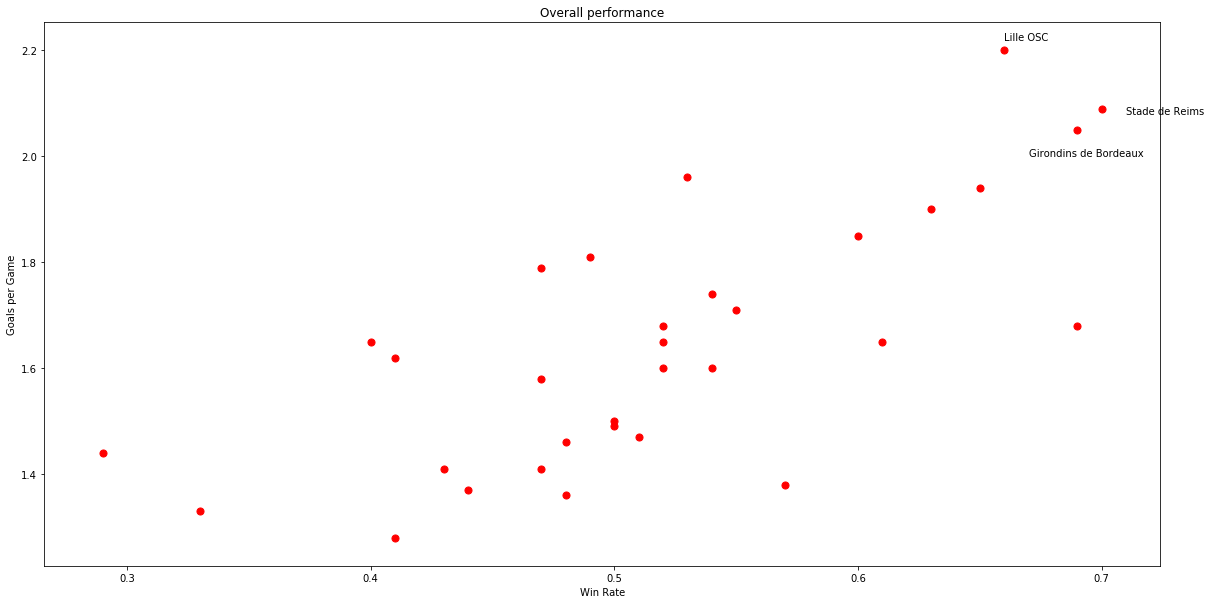

In [89]:
#Now to plot

plt.figure(figsize=(20,10))

x = games['WinRate']
y = games['Goals/G']
size = games['#Games']

plt.scatter(x, y, s=50, c='red')

plt.title('Overall performance')
plt.xlabel('Win Rate')
plt.ylabel('Goals per Game')
plt.savefig('ScatterPlot_04.png')

plt.text(0.71, 2.08, 'Stade de Reims')
plt.text(0.66, 2.22, 'Lille OSC')
plt.text(0.67, 2, 'Girondins de Bordeaux')

plt.grid(0)

plt.show()

As shown in the scatter plot above, three teams seem to stand out from the rest : Lille OSC, Stade de Reims and Girondins de Bordeaux.

Lille OSC had the best goal per game average, and Stade de Reims had the best win rate over the the 1945-1954 seasons.

All three of these teams are still in the top French division and are considered to be French football monuments.





# Conclusion

###### For this project, we went through heaps of data about our French Football League, Ligue 1.

###### We wanted to prove that the Home Advantage existed in football, and we did : there are now even cofficients for this phenomenon (of course only in Ligue 1, and for two restricted time periods).

###### What's more, the extensive data analysis allowed us to gain more insight on what French football was like 60 years ago, a period that not many fans take an interest to.

###### We hope that you found our project and topic interesting, even if you're not a football fan like us.

###### Thank you for reading !